In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv("../data/AddOrRemoveReport.csv")

username  = "fossas"
repo = "fossa-cli"

# Filter the DataFrame for the repository 
grafana_df = df[df["Username"] == username]

# Select only the required columns for correlation
selected_columns = ["Percentage", "Star_Count", "Additions", "Deletions",]
selected_df = grafana_df[selected_columns]
sns.heatmap(selected_df.corr().round(2), annot=True, cmap="vlag", linewidths=0.5, vmin=-1, vmax=1, center=0)
plt.title(f"Correlation Matrix for {username}/{repo} Repository")
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("merged_data.csv")

# Specify the list of repositories
repositories_list = ["RocketChat"]

# Filter the DataFrame for the specified repositories and concatenate them
selected_df = pd.concat([df[df["Username"] == repo_name] for repo_name in repositories_list])

# Select the columns for correlation
selected_columns = ["Percentage", "Star_Count", "Additions", "Deletions", "Daily_Count"]
selected_df = selected_df[selected_columns]

# Generate the correlation matrix
correlation_matrix = selected_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="vlag", linewidths=0.5, vmin=-1, vmax=1, center=0)
plt.title("Combined Correlation Matrix for High Popularity Repositories")
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Read the CSV file into a DataFrame
df = pd.read_csv("merged_data.csv")

# Get the list of unique repository names
repositories_list = df["Username"].unique()

# Initialize an empty DataFrame to store concatenated data
concatenated_df = pd.DataFrame()

# Initialize a dictionary to store correlation coefficients and p-values
correlation_data = {"Feature 1": [], "Feature 2": [], "Correlation Coefficient": [], "P-Value": []}

# Iterate over each repository
for repo_name in repositories_list:
    # Filter the DataFrame for the current repository
    selected_df = df[df["Username"] == repo_name]
    
    # Select the columns for correlation
    selected_columns = ["Percentage", "Star_Count", "Additions", "Deletions", "Daily_Count"]
    selected_df = selected_df[selected_columns]
    
    # Concatenate the selected data with the DataFrame
    concatenated_df = pd.concat([concatenated_df, selected_df])

# Generate the correlation matrix
correlation_matrix = concatenated_df.corr()

# Iterate over pairs of features to calculate correlation coefficients and p-values
for i, feature1 in enumerate(selected_columns):
    for j, feature2 in enumerate(selected_columns):
        if i < j:  # Avoid redundant calculations (correlation matrix is symmetric)
            # Calculate correlation coefficient and p-value
            corr_coef, p_value = pearsonr(concatenated_df[feature1], concatenated_df[feature2])
            correlation_data["Feature 1"].append(feature1)
            correlation_data["Feature 2"].append(feature2)
            correlation_data["Correlation Coefficient"].append(corr_coef)
            correlation_data["P-Value"].append(p_value)

# Convert correlation data dictionary to DataFrame
correlation_df = pd.DataFrame(correlation_data)

# Plot the heatmap with a different color palette
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1, center=0)
plt.title("Combined Correlation Matrix for All Repositories Including Daily Count")
plt.show()

# Display correlation coefficients and p-values
print(correlation_df)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("../data/AddOrRemoveReport.csv")

# Specify the list of repositories
repositories_list = ['dandavison',  'whatyouhide']

# Filter the DataFrame for the specified repositories and concatenate them
selected_df = pd.concat([df[df["Username"] == repo_name] for repo_name in repositories_list])

# Select only the required columns for correlation
selected_columns = ["Percentage", "Star_Count", "Additions", "Deletions"]
selected_df = selected_df[selected_columns]

# Generate the correlation matrix
correlation_matrix = selected_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="vlag", linewidths=0.5, vmin=-1, vmax=1, center=0)
plt.title("Combined Correlation Matrix for High Popularity Repositories")
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, t

# Read the CSV file into a DataFrame
df = pd.read_csv("merged_data.csv")

# Get the list of unique repository names
repositories_list = df["Username"].unique()

# Initialize an empty DataFrame to store concatenated data
concatenated_df = pd.DataFrame()

# Initialize a dictionary to store correlation coefficients and p-values
correlation_data = {"Feature 1": [], "Feature 2": [], "Correlation Coefficient": [], "P-Value": []}

# Iterate over each repository
for repo_name in repositories_list:
    # Filter the DataFrame for the current repository
    selected_df = df[df["Username"] == repo_name]
    
    # Select the columns for correlation
    selected_columns = ["Percentage", "Star_Count", "Additions", "Deletions", "Daily_Count"]
    selected_df = selected_df[selected_columns]
    
    # Concatenate the selected data with the DataFrame
    concatenated_df = pd.concat([concatenated_df, selected_df])

# Generate the correlation matrix
correlation_matrix = concatenated_df.corr()

# Iterate over pairs of features to calculate correlation coefficients and p-values
for i, feature1 in enumerate(selected_columns):
    for j, feature2 in enumerate(selected_columns):
        if i < j:  # Avoid redundant calculations (correlation matrix is symmetric)
            # Calculate correlation coefficient and p-value
            corr_coef, p_value = pearsonr(concatenated_df[feature1], concatenated_df[feature2])
            correlation_data["Feature 1"].append(feature1)
            correlation_data["Feature 2"].append(feature2)
            correlation_data["Correlation Coefficient"].append(corr_coef)
            correlation_data["P-Value"].append(p_value)

# Convert correlation data dictionary to DataFrame
correlation_df = pd.DataFrame(correlation_data)

# Plot the heatmap with a different color palette
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1, center=0)
plt.title("Combined Correlation Matrix for All Repositories Including Daily Count")
plt.show()

# Display correlation coefficients and p-values
print(correlation_df)

# Calculate the t-test for each pair of features
for index, row in correlation_df.iterrows():
    feature1 = row["Feature 1"]
    feature2 = row["Feature 2"]
    corr_coef = row["Correlation Coefficient"]
    p_value = row["P-Value"]
    n = len(concatenated_df)
    
    # Calculate the t-statistic
    t_statistic = corr_coef * ((n - 2) / (1 - corr_coef**2))**0.5
    
    # Calculate degrees of freedom
    degrees_of_freedom = n - 2
    
    # Calculate the critical value from the t-distribution for a two-tailed test with alpha = 0.05
    critical_value = t.ppf(1 - 0.05 / 2, degrees_of_freedom)
    
    # Determine if the correlation is statistically significant
    if abs(t_statistic) > critical_value:
        significance = "Statistically significant"
    else:
        significance = "Not statistically significant"
    
    print(f"t-test result for {feature1} and {feature2}:")
    print(f"t-statistic: {t_statistic}")
    print(f"Critical value: {critical_value}")
    print(f"Significance: {significance}")
    print()


In [ ]:
# Define a function to interpret the strength of correlation based on the correlation coefficient (r)
def interpret_correlation_strength(r):
    if abs(r) >= 0.8:
        return "Very strong correlation"
    elif abs(r) >= 0.6:
        return "Strong correlation"
    elif abs(r) >= 0.4:
        return "Moderate correlation"
    elif abs(r) >= 0.2:
        return "Weak correlation"
    else:
        return "Very weak correlation"

# Iterate over pairs of features to calculate correlation coefficients and interpret the strength
for i, feature1 in enumerate(selected_columns):
    for j, feature2 in enumerate(selected_columns):
        if i < j:  # Avoid redundant calculations (correlation matrix is symmetric)
            # Get the correlation coefficient
            corr_coef = correlation_matrix.loc[feature1, feature2]
            
            # Interpret the strength of correlation
            strength = interpret_correlation_strength(corr_coef)
            
            print(f"Correlation between {feature1} and {feature2}: {corr_coef:.2f} ({strength})")


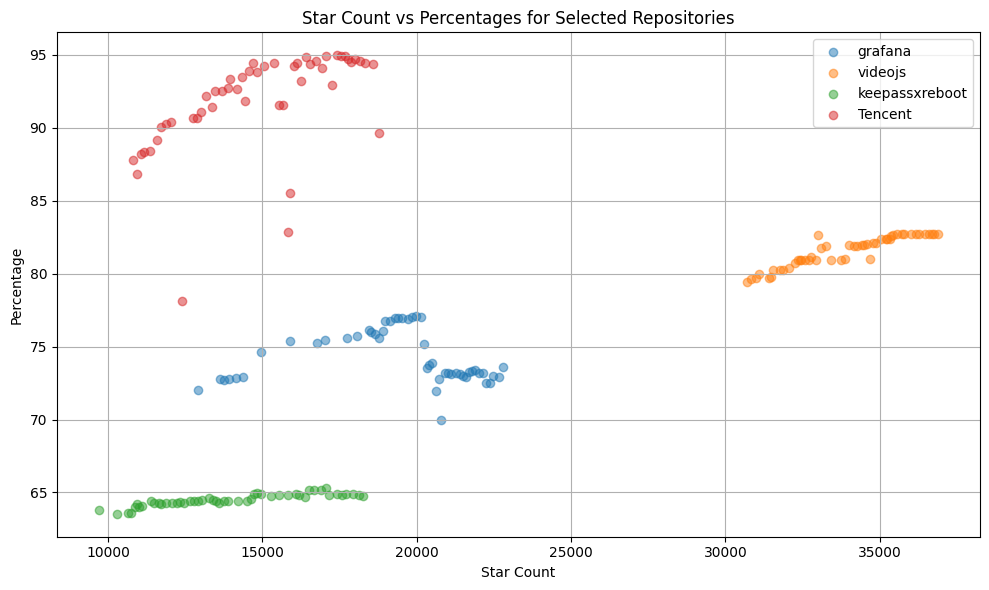

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('FinalReport.csv')

data = {
    "Very High Star Count Repositories": ["airbnb", "facebook"],
    "High Star Count Repositories": ["RocketChat", "date-fns", "metabase", "tqdm", "axios", "dzenbot", "halfrost", "beego", "go-kratos", "getsentry", "chartjs", "go-gorm", "grafana", "parcel-bundler", "swoole", "go-gitea", "valyala", "rapid7", "apache", "grpc", "vapor", "lsd-rs", "felangel", "nsqio", "alibaba", "brettwooldridge", "dromara", "k3s-io", "toeverything", "pingcap", "babel", "mojs", "openssl", "mybatis", "photoprism", "mislav", "AdguardTeam", "SDWebImage", "dandavison", "encode", "Moya", "dapr", "istio", "n8n-io", "typeorm", "forem", "jestjs", "ant-design", "freeCodeCamp", "charmbracelet", "Tencent", "RustPython", "fastlane", "certbot", "jedisct1", "videojs", "TryGhost", "urfave", "keepassxreboot", "goharbor", "jesseduffield", "xi-editor", "diem", "httpie"],
    "Medium Star Count Repositories": ["krzysztofzablocki", "JuliaPlots", "ueberauth", "zio", "monix", "jogboms", "react-hook-form", "DioxusLabs", "sksamuel", "spark-jobserver", "ThreeMammals", "circe", "mozilla-mobile", "reactiveui", "bitwalker", "timholy", "rrousselGit", "JuliaSymbolics", "brianegan", "Cocoanetics", "luarocks", "elixir-wallaby", "IFTTT", "roughike", "mojotech", "mockk", "twitter-archive", "JuliaPy", "lukepighetti", "thechangelog", "mesosphere", "ReSwift", "twitter", "esp8266", "salesforce", "github", "gnachman", "Hammerspoon", "chef", "pry", "whatyouhide", "firezone", "opf", "activeadmin", "finagle", "isar", "QuantConnect", "hiddentao", "ruby-grape", "fthomas", "cesanta", "tekartik", "tgstation", "whitfin", "node-cache", "calcom", "facebookarchive", "wireapp", "sparkle-project", "duplicati", "kickstarter", "mossr", "chocolatey", "rust-lang", "fzyzcjy", "omniauth", "colinhacks", "alexjoverm", "schollz", "zetbaitsu", "danielgtaylor", "ReactiveX", "jump-dev", "ankidroid", "microsoft"],
    "Low Star Count Repositories": ["dianping", "Transmode", "pledbrook", "fossas", "cstjean", "chengchingwen", "JuliaGraphics", "elixir-tesla", "JuliaStats", "ihub-pub", "FRBNY-DSGE", "joshday", "ryansonshine", "jonathan-laurent", "allegro", "JuliaParallel", "nebula-plugins", "AlgebraicJulia", "pluskid", "boennemann", "JuliaCI", "JuliaCN", "openbakery", "ash-project", "JuliaDynamics", "JuliaInterop", "reanimate", "PainterQubits", "mcabbott", "SciML", "JuliaIO", "JuliaApproximation", "JuliaMath", "weymouth", "JuliaCollections"]
}

# Define the list of repositories
# repositories_list = data["Medium Star Count Repositories"]
repositories_list = ["grafana", "videojs",  "keepassxreboot", "Tencent"]

# Filter the DataFrame for the specified repositories
filtered_df = df[df['Username'].isin(repositories_list)]

# Plot star count vs percentages for the filtered DataFrame
plt.figure(figsize=(10, 6))
for repo_name in repositories_list:
    repo_data = filtered_df[filtered_df['Username'] == repo_name]
    plt.scatter(repo_data['Star_Count'], repo_data['Percentage'], label=repo_name, alpha=0.5)

plt.title('Star Count vs Percentages for Selected Repositories')
plt.xlabel('Star Count')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## High Star Count

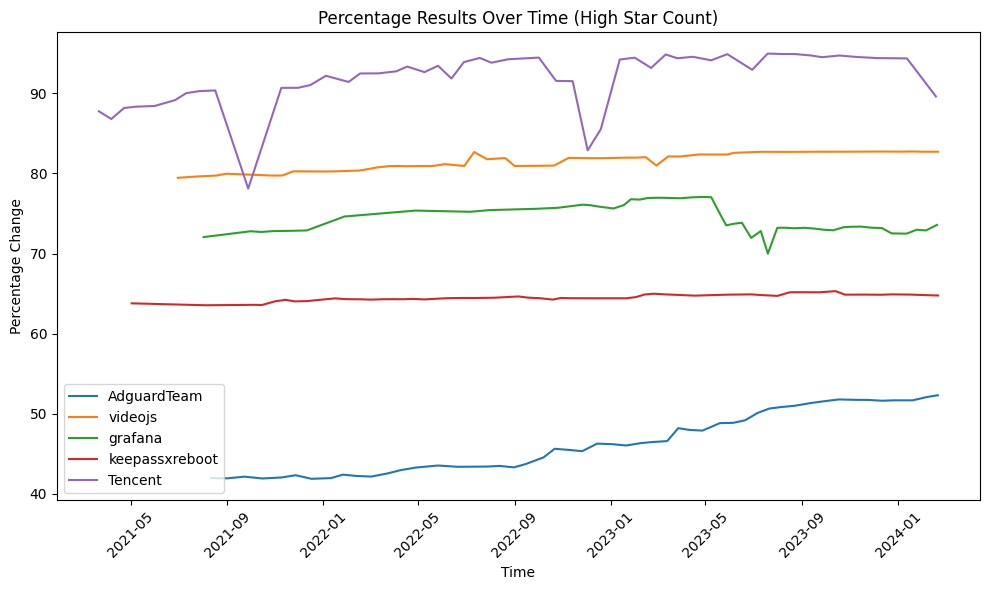

In [22]:

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('FinalReport.csv')

# Define the original format string with milliseconds
original_format_string = '%Y-%m-%dT%H:%M:%S.%fZ'

# Define the parse_date function
def parse_date(date_string, format_string):
    try:
        return datetime.strptime(date_string, format_string)
    except ValueError:
        # If parsing with milliseconds fails, try parsing without milliseconds
        format_string_without_ms = '%Y-%m-%dT%H:%M:%SZ'
        return datetime.strptime(date_string, format_string_without_ms)

# Convert the 'Timestamp' column to datetime type using parse_date
df['Timestamp'] = df['Timestamp'].apply(lambda x: parse_date(x, original_format_string))

# Sort the DataFrame by 'Timestamp'
df = df.sort_values(by='Timestamp')

data =["RocketChat", "date-fns", "metabase", "tqdm", "axios", "dzenbot", "halfrost", "beego", "go-kratos", "getsentry", "chartjs", "go-gorm", "grafana", "parcel-bundler", "swoole", "go-gitea", "valyala", "rapid7", "apache", "grpc", "vapor", "lsd-rs", "felangel", "nsqio", "alibaba", "brettwooldridge", "dromara", "k3s-io", "toeverything", "pingcap", "babel", "mojs", "openssl", "mybatis", "photoprism", "mislav", "AdguardTeam", "SDWebImage", "dandavison", "encode", "Moya", "dapr", "istio", "n8n-io", "typeorm", "forem", "jestjs", "ant-design", "freeCodeCamp", "charmbracelet", "Tencent", "RustPython", "fastlane", "certbot", "jedisct1", "videojs", "TryGhost", "urfave", "keepassxreboot", "goharbor", "jesseduffield", "xi-editor", "diem", "httpie"]


# Define the repository list
repositories_list = ['AdguardTeam', 'JuliaCI', 'jump-dev', 'videojs', 'weymouth', 'grafana', 'JuliaSymbolics', 'ihub-pub', 'keepassxreboot', 'microsoft', 'Tencent', 'kickstarter', 'allegro']

newList = []
for i in repositories_list:
  if i in data:
    newList.append(i)


# Plot code coverage results for each repository in the list
plt.figure(figsize=(10, 6))
for repo_name in newList:
    repository_df = df[df['Username'] == repo_name]
    plt.plot(repository_df['Timestamp'], repository_df['Percentage'], label=repo_name)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Percentage Change')
plt.title('Percentage Results Over Time (High Star Count)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

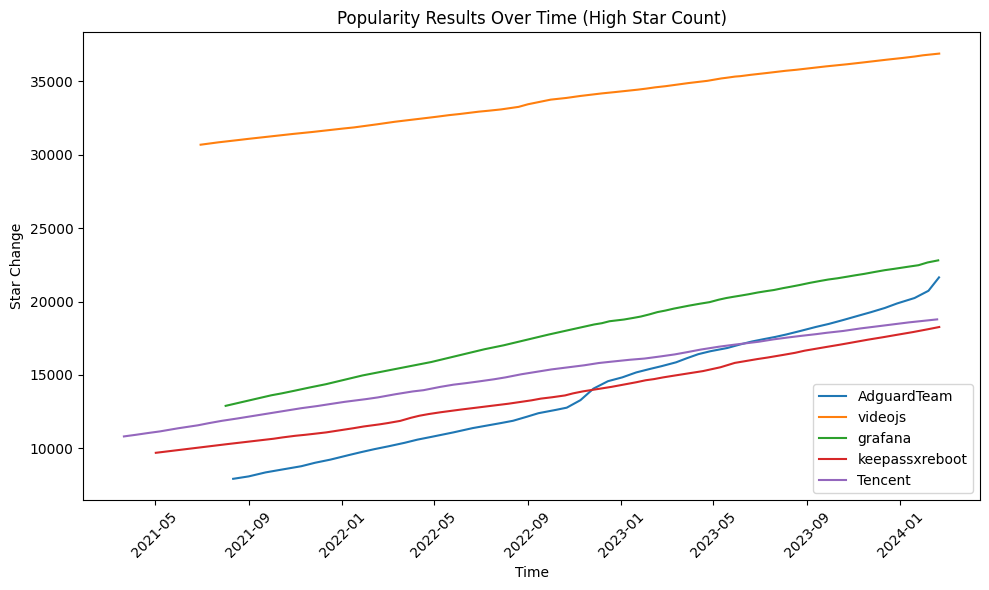

In [24]:

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('FinalReport.csv')

# Define the original format string with milliseconds
original_format_string = '%Y-%m-%dT%H:%M:%S.%fZ'

# Define the parse_date function
def parse_date(date_string, format_string):
    try:
        return datetime.strptime(date_string, format_string)
    except ValueError:
        # If parsing with milliseconds fails, try parsing without milliseconds
        format_string_without_ms = '%Y-%m-%dT%H:%M:%SZ'
        return datetime.strptime(date_string, format_string_without_ms)

# Convert the 'Timestamp' column to datetime type using parse_date
df['Timestamp'] = df['Timestamp'].apply(lambda x: parse_date(x, original_format_string))

# Sort the DataFrame by 'Timestamp'
df = df.sort_values(by='Timestamp')


data =["RocketChat", "date-fns", "metabase", "tqdm", "axios", "dzenbot", "halfrost", "beego", "go-kratos", "getsentry", "chartjs", "go-gorm", "grafana", "parcel-bundler", "swoole", "go-gitea", "valyala", "rapid7", "apache", "grpc", "vapor", "lsd-rs", "felangel", "nsqio", "alibaba", "brettwooldridge", "dromara", "k3s-io", "toeverything", "pingcap", "babel", "mojs", "openssl", "mybatis", "photoprism", "mislav", "AdguardTeam", "SDWebImage", "dandavison", "encode", "Moya", "dapr", "istio", "n8n-io", "typeorm", "forem", "jestjs", "ant-design", "freeCodeCamp", "charmbracelet", "Tencent", "RustPython", "fastlane", "certbot", "jedisct1", "videojs", "TryGhost", "urfave", "keepassxreboot", "goharbor", "jesseduffield", "xi-editor", "diem", "httpie"]


# Define the repository list
repositories_list = ['AdguardTeam', 'JuliaCI', 'jump-dev', 'videojs', 'weymouth', 'grafana', 'JuliaSymbolics', 'ihub-pub', 'keepassxreboot', 'microsoft', 'Tencent', 'kickstarter', 'allegro']

newList = []
for i in repositories_list:
  if i in data:
    newList.append(i)


# Plot code coverage results for each repository in the list
plt.figure(figsize=(10, 6))
for repo_name in newList:
    repository_df = df[df['Username'] == repo_name]
    plt.plot(repository_df['Timestamp'], repository_df['Star_Count'], label=repo_name)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Star Change')
plt.title('Popularity Results Over Time (High Star Count)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


## Medium Star Count

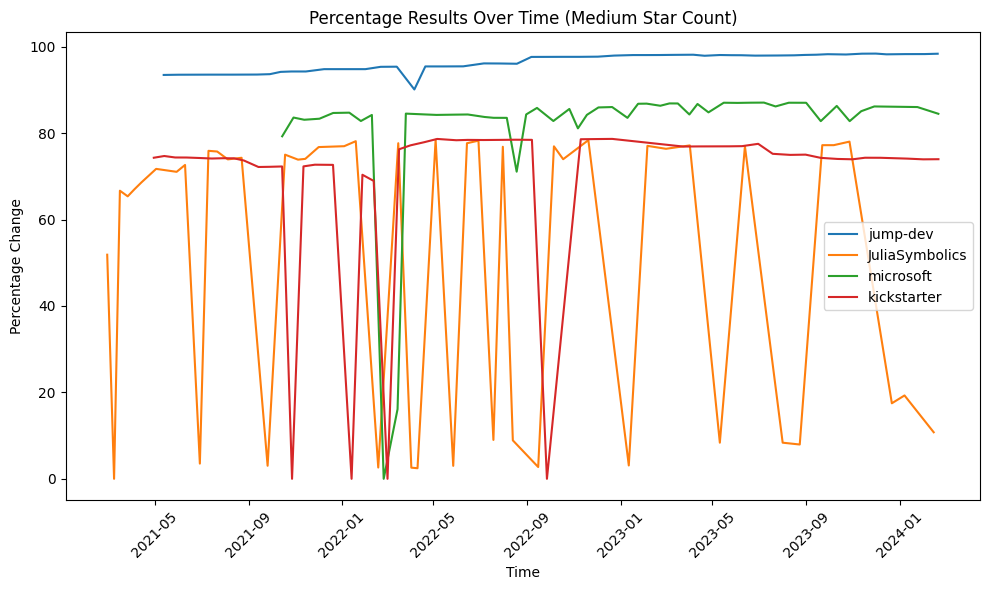

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('FinalReport.csv')

# Define the original format string with milliseconds
original_format_string = '%Y-%m-%dT%H:%M:%S.%fZ'

# Define the parse_date function
def parse_date(date_string, format_string):
    try:
        return datetime.strptime(date_string, format_string)
    except ValueError:
        # If parsing with milliseconds fails, try parsing without milliseconds
        format_string_without_ms = '%Y-%m-%dT%H:%M:%SZ'
        return datetime.strptime(date_string, format_string_without_ms)

# Convert the 'Timestamp' column to datetime type using parse_date
df['Timestamp'] = df['Timestamp'].apply(lambda x: parse_date(x, original_format_string))

# Sort the DataFrame by 'Timestamp'
df = df.sort_values(by='Timestamp')

data =["krzysztofzablocki", "JuliaPlots", "ueberauth", "zio", "monix", "jogboms", "react-hook-form", "DioxusLabs", "sksamuel", "spark-jobserver", "ThreeMammals", "circe", "mozilla-mobile", "reactiveui", "bitwalker", "timholy", "rrousselGit", "JuliaSymbolics", "brianegan", "Cocoanetics", "luarocks", "elixir-wallaby", "IFTTT", "roughike", "mojotech", "mockk", "twitter-archive", "JuliaPy", "lukepighetti", "thechangelog", "mesosphere", "ReSwift", "twitter", "esp8266", "salesforce", "github", "gnachman", "Hammerspoon", "chef", "pry", "whatyouhide", "firezone", "opf", "activeadmin", "finagle", "isar", "QuantConnect", "hiddentao", "ruby-grape", "fthomas", "cesanta", "tekartik", "tgstation", "whitfin", "node-cache", "calcom", "facebookarchive", "wireapp", "sparkle-project", "duplicati", "kickstarter", "mossr", "chocolatey", "rust-lang", "fzyzcjy", "omniauth", "colinhacks", "alexjoverm", "schollz", "zetbaitsu", "danielgtaylor", "ReactiveX", "jump-dev", "ankidroid", "microsoft"]


# Define the repository list
repositories_list = ['AdguardTeam', 'JuliaCI', 'jump-dev', 'videojs', 'weymouth', 'JuliaSymbolics', 'grafana', 'ihub-pub', 'keepassxreboot', 'microsoft', 'Tencent', 'kickstarter', 'allegro']

newList = []
for i in repositories_list:
  if i in data:
    newList.append(i)


# Plot code coverage results for each repository in the list
plt.figure(figsize=(10, 6))
for repo_name in newList:
    repository_df = df[df['Username'] == repo_name]
    plt.plot(repository_df['Timestamp'], repository_df['Percentage'], label=repo_name)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Percentage Change')
plt.title('Percentage Results Over Time (Medium Star Count)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

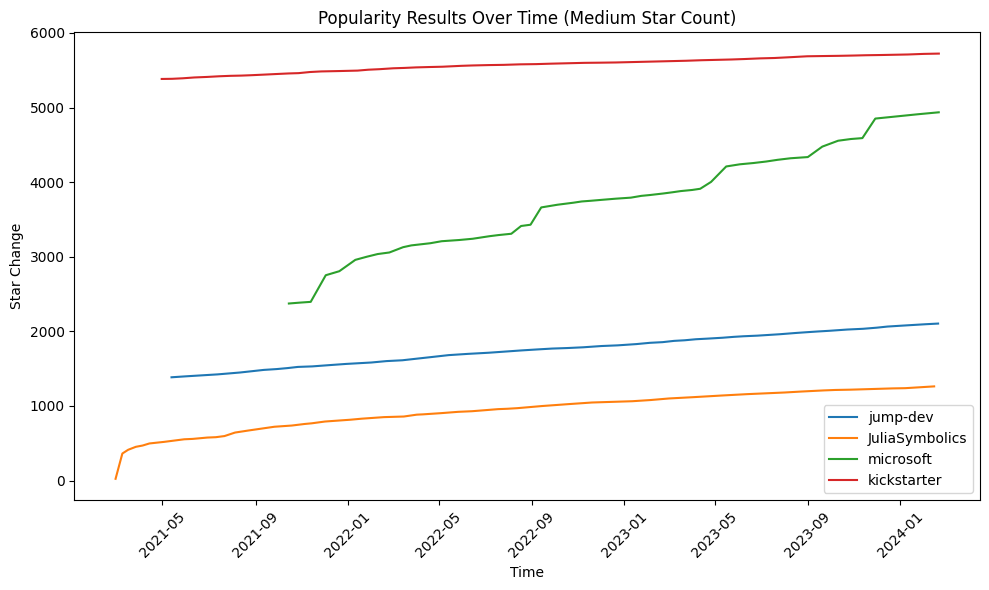

In [28]:

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('FinalReport.csv')

# Define the original format string with milliseconds
original_format_string = '%Y-%m-%dT%H:%M:%S.%fZ'

# Define the parse_date function
def parse_date(date_string, format_string):
    try:
        return datetime.strptime(date_string, format_string)
    except ValueError:
        # If parsing with milliseconds fails, try parsing without milliseconds
        format_string_without_ms = '%Y-%m-%dT%H:%M:%SZ'
        return datetime.strptime(date_string, format_string_without_ms)

# Convert the 'Timestamp' column to datetime type using parse_date
df['Timestamp'] = df['Timestamp'].apply(lambda x: parse_date(x, original_format_string))

# Sort the DataFrame by 'Timestamp'
df = df.sort_values(by='Timestamp')


data =["krzysztofzablocki", "JuliaPlots", "ueberauth", "zio", "monix", "jogboms", "react-hook-form", "DioxusLabs", "sksamuel", "spark-jobserver", "ThreeMammals", "circe", "mozilla-mobile", "reactiveui", "bitwalker", "timholy", "rrousselGit", "JuliaSymbolics", "brianegan", "Cocoanetics", "luarocks", "elixir-wallaby", "IFTTT", "roughike", "mojotech", "mockk", "twitter-archive", "JuliaPy", "lukepighetti", "thechangelog", "mesosphere", "ReSwift", "twitter", "esp8266", "salesforce", "github", "gnachman", "Hammerspoon", "chef", "pry", "whatyouhide", "firezone", "opf", "activeadmin", "finagle", "isar", "QuantConnect", "hiddentao", "ruby-grape", "fthomas", "cesanta", "tekartik", "tgstation", "whitfin", "node-cache", "calcom", "facebookarchive", "wireapp", "sparkle-project", "duplicati", "kickstarter", "mossr", "chocolatey", "rust-lang", "fzyzcjy", "omniauth", "colinhacks", "alexjoverm", "schollz", "zetbaitsu", "danielgtaylor", "ReactiveX", "jump-dev", "ankidroid", "microsoft"]


# Define the repository list
repositories_list = ['AdguardTeam', 'JuliaCI', 'jump-dev', 'videojs', 'weymouth', 'grafana', 'JuliaSymbolics', 'ihub-pub', 'keepassxreboot', 'microsoft', 'Tencent', 'kickstarter', 'allegro']

newList = []
for i in repositories_list:
  if i in data:
    newList.append(i)


# Plot code coverage results for each repository in the list
plt.figure(figsize=(10, 6))
for repo_name in newList:
    repository_df = df[df['Username'] == repo_name]
    plt.plot(repository_df['Timestamp'], repository_df['Star_Count'], label=repo_name)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Star Change')
plt.title('Popularity Results Over Time (Medium Star Count)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

## Low Star Count


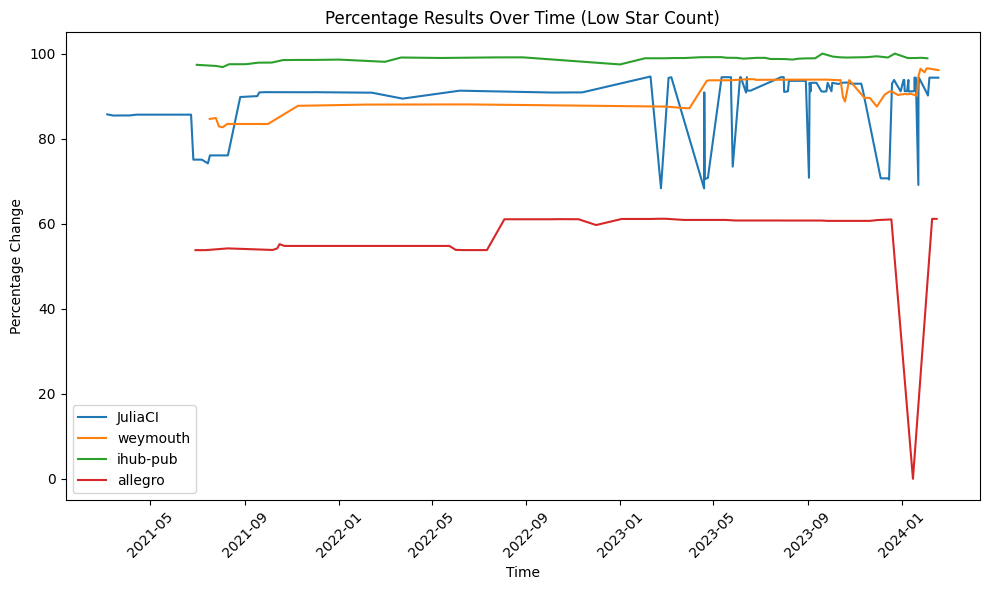

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('FinalReport.csv')

# Define the original format string with milliseconds
original_format_string = '%Y-%m-%dT%H:%M:%S.%fZ'

# Define the parse_date function
def parse_date(date_string, format_string):
    try:
        return datetime.strptime(date_string, format_string)
    except ValueError:
        # If parsing with milliseconds fails, try parsing without milliseconds
        format_string_without_ms = '%Y-%m-%dT%H:%M:%SZ'
        return datetime.strptime(date_string, format_string_without_ms)

# Convert the 'Timestamp' column to datetime type using parse_date
df['Timestamp'] = df['Timestamp'].apply(lambda x: parse_date(x, original_format_string))

# Sort the DataFrame by 'Timestamp'
df = df.sort_values(by='Timestamp')

data =["dianping", "Transmode", "pledbrook", "fossas", "cstjean", "chengchingwen", "JuliaGraphics", "elixir-tesla", "JuliaStats", "ihub-pub", "FRBNY-DSGE", "joshday", "ryansonshine", "jonathan-laurent", "allegro", "JuliaParallel", "nebula-plugins", "AlgebraicJulia", "pluskid", "boennemann", "JuliaCI", "JuliaCN", "openbakery", "ash-project", "JuliaDynamics", "JuliaInterop", "reanimate", "PainterQubits", "mcabbott", "SciML", "JuliaIO", "JuliaApproximation", "JuliaMath", "weymouth", "JuliaCollections"]


# Define the repository list
repositories_list = ['AdguardTeam', 'JuliaCI', 'jump-dev', 'videojs', 'weymouth', 'grafana', 'JuliaSymbolics', 'ihub-pub', 'keepassxreboot', 'microsoft', 'Tencent', 'kickstarter', 'allegro']

newList = []
for i in repositories_list:
  if i in data:
    newList.append(i)


# Plot code coverage results for each repository in the list
plt.figure(figsize=(10, 6))
for repo_name in newList:
    repository_df = df[df['Username'] == repo_name]
    plt.plot(repository_df['Timestamp'], repository_df['Percentage'], label=repo_name)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Percentage Change')
plt.title('Percentage Results Over Time (Low Star Count)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

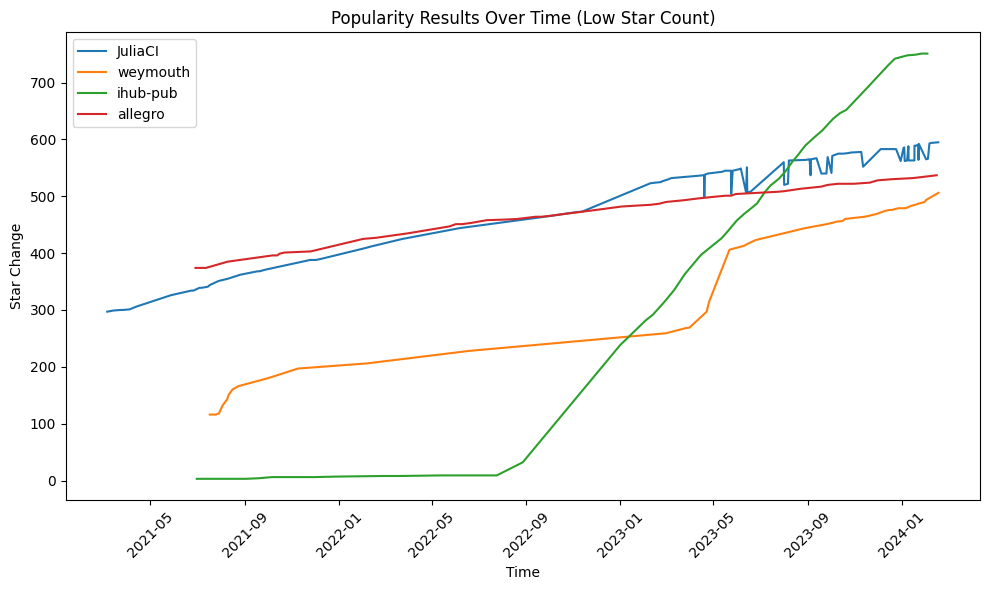

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('FinalReport.csv')

# Define the original format string with milliseconds
original_format_string = '%Y-%m-%dT%H:%M:%S.%fZ'

# Define the parse_date function
def parse_date(date_string, format_string):
    try:
        return datetime.strptime(date_string, format_string)
    except ValueError:
        # If parsing with milliseconds fails, try parsing without milliseconds
        format_string_without_ms = '%Y-%m-%dT%H:%M:%SZ'
        return datetime.strptime(date_string, format_string_without_ms)

# Convert the 'Timestamp' column to datetime type using parse_date
df['Timestamp'] = df['Timestamp'].apply(lambda x: parse_date(x, original_format_string))

# Sort the DataFrame by 'Timestamp'
df = df.sort_values(by='Timestamp')


data =["dianping", "Transmode", "pledbrook", "fossas", "cstjean", "chengchingwen", "JuliaGraphics", "elixir-tesla", "JuliaStats", "ihub-pub", "FRBNY-DSGE", "joshday", "ryansonshine", "jonathan-laurent", "allegro", "JuliaParallel", "nebula-plugins", "AlgebraicJulia", "pluskid", "boennemann", "JuliaCI", "JuliaCN", "openbakery", "ash-project", "JuliaDynamics", "JuliaInterop", "reanimate", "PainterQubits", "mcabbott", "SciML", "JuliaIO", "JuliaApproximation", "JuliaMath", "weymouth", "JuliaCollections"]


# Define the repository list
repositories_list = ['AdguardTeam', 'JuliaCI', 'jump-dev', 'videojs', 'weymouth', 'grafana', 'JuliaSymbolics', 'ihub-pub', 'keepassxreboot', 'microsoft', 'Tencent', 'kickstarter', 'allegro']

newList = []
for i in repositories_list:
  if i in data:
    newList.append(i)


# Plot code coverage results for each repository in the list
plt.figure(figsize=(10, 6))
for repo_name in newList:
    repository_df = df[df['Username'] == repo_name]
    plt.plot(repository_df['Timestamp'], repository_df['Star_Count'], label=repo_name)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Star Change')
plt.title('Popularity Results Over Time (Low Star Count)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

## Stars vs Additions

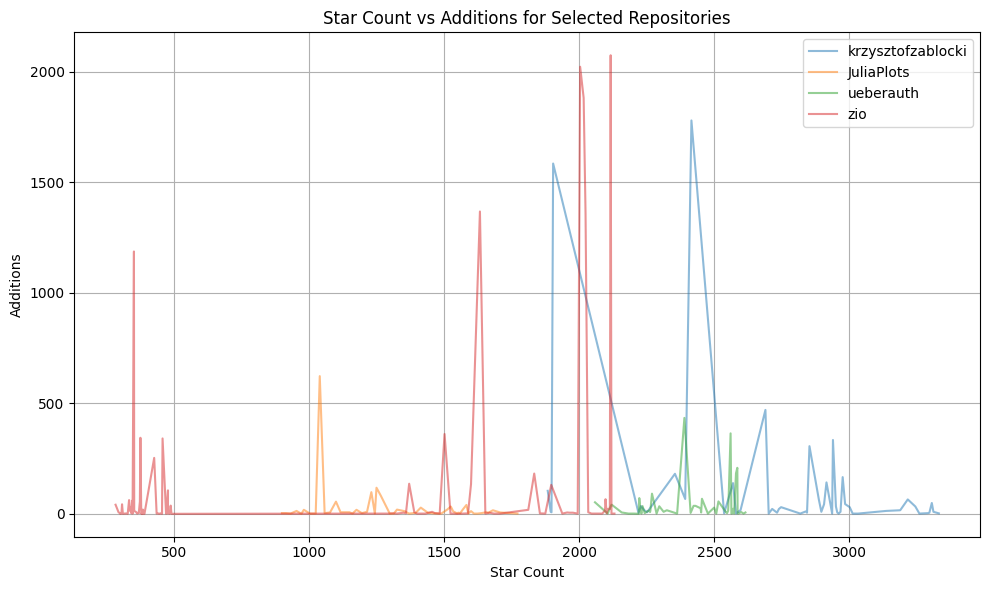

In [12]:
# Stars Vs Additions

import pandas as pd
import matplotlib.pyplot as plt
import re

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('AddOrRemoveReport.csv')

data = {
    "Very High Star Count Repositories": ["airbnb", "facebook"],
    "High Star Count Repositories": ["RocketChat", "date-fns", "metabase", "tqdm", "axios", "dzenbot", "halfrost", "beego", "go-kratos", "getsentry", "chartjs", "go-gorm", "grafana", "parcel-bundler", "swoole", "go-gitea", "valyala", "rapid7", "apache", "grpc", "vapor", "lsd-rs", "felangel", "nsqio", "alibaba", "brettwooldridge", "dromara", "k3s-io", "toeverything", "pingcap", "babel", "mojs", "openssl", "mybatis", "photoprism", "mislav", "AdguardTeam", "SDWebImage", "dandavison", "encode", "Moya", "dapr", "istio", "n8n-io", "typeorm", "forem", "jestjs", "ant-design", "freeCodeCamp", "charmbracelet", "Tencent", "RustPython", "fastlane", "certbot", "jedisct1", "videojs", "TryGhost", "urfave", "keepassxreboot", "goharbor", "jesseduffield", "xi-editor", "diem", "httpie"],
    "Medium Star Count Repositories": ["krzysztofzablocki", "JuliaPlots", "ueberauth", "zio", "monix", "jogboms", "react-hook-form", "DioxusLabs", "sksamuel", "spark-jobserver", "ThreeMammals", "circe", "mozilla-mobile", "reactiveui", "bitwalker", "timholy", "rrousselGit", "JuliaSymbolics", "brianegan", "Cocoanetics", "luarocks", "elixir-wallaby", "IFTTT", "roughike", "mojotech", "mockk", "twitter-archive", "JuliaPy", "lukepighetti", "thechangelog", "mesosphere", "ReSwift", "twitter", "esp8266", "salesforce", "github", "gnachman", "Hammerspoon", "chef", "pry", "whatyouhide", "firezone", "opf", "activeadmin", "finagle", "isar", "QuantConnect", "hiddentao", "ruby-grape", "fthomas", "cesanta", "tekartik", "tgstation", "whitfin", "node-cache", "calcom", "facebookarchive", "wireapp", "sparkle-project", "duplicati", "kickstarter", "mossr", "chocolatey", "rust-lang", "fzyzcjy", "omniauth", "colinhacks", "alexjoverm", "schollz", "zetbaitsu", "danielgtaylor", "ReactiveX", "jump-dev", "ankidroid", "microsoft"],
    "Low Star Count Repositories": ["dianping", "Transmode", "pledbrook", "fossas", "cstjean", "chengchingwen", "JuliaGraphics", "elixir-tesla", "JuliaStats", "ihub-pub", "FRBNY-DSGE", "joshday", "ryansonshine", "jonathan-laurent", "allegro", "JuliaParallel", "nebula-plugins", "AlgebraicJulia", "pluskid", "boennemann", "JuliaCI", "JuliaCN", "openbakery", "ash-project", "JuliaDynamics", "JuliaInterop", "reanimate", "PainterQubits", "mcabbott", "SciML", "JuliaIO", "JuliaApproximation", "JuliaMath", "weymouth", "JuliaCollections"]
}

# Define the list of repositories
# repositories_list = data["Medium Star Count Repositories"]
repositories_list = ["krzysztofzablocki", "JuliaPlots", "ueberauth", "zio"]

# Filter the DataFrame for the specified repositories
filtered_df = df[df['Username'].isin(repositories_list)]

# Plot star count vs percentages for the filtered DataFrame
plt.figure(figsize=(10, 6))
for repo_name in repositories_list:
    repo_data = filtered_df[filtered_df['Username'] == repo_name]
    plt.plot(repo_data['Star_Count'], repo_data['Additions'], label=repo_name, alpha=0.5)

plt.title('Star Count vs Additions for Selected Repositories')
plt.xlabel('Star Count')
plt.ylabel('Additions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()